In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
#given distance and radius of the sensing unit
d = 5 #cm
r = 0.56 #cm
A = np.pi*r**2

# steradian
SR = A/d**2
ang = np.rad2deg(np.arctan(r/d))
print(ang,A)

# Reading the data from the file
filename = "data\\520nm_300mA_30cm_1LED.txt"

6.390495314646984 0.9852034561657592


### Theoretical Calculation of power at given angle

In [3]:
ele = np.deg2rad(np.linspace(-90,90,180)) # defining theta
azi = np.deg2rad(np.linspace(-90,90,180)) # defining theta

Ir = np.zeros([len(ele),len(azi)])

k = (2/np.pi)**2

for i in range(len(ele)):
    for j in range(len(azi)):
        Ir[i][j] = -k*(ele[i]**2+azi[j]**2) + 1

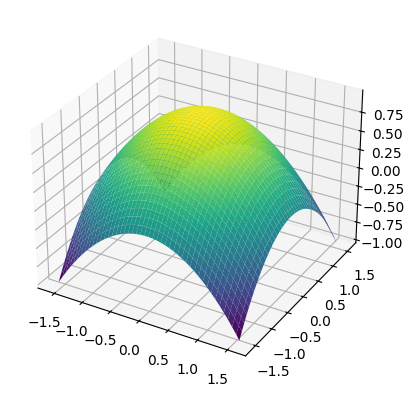

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

e, a = np.meshgrid(ele, azi)

# Plot a 3D surface
ax.plot_surface(e, a, Ir, cmap='viridis')

plt.show()

In [5]:
# Integrate over azimuth first, then elevation
integral_azi = simps(Ir, azi, axis=1)  # Integrate over azi for each ele
scl = simps(integral_azi, ele)  # Integrate over ele
scl

3.2898681336964515

In [6]:
#to integrate over a specific angle range
ele = np.deg2rad(np.linspace(-ang,ang,1000)) # defining theta
azi = np.deg2rad(np.linspace(-ang,ang,1000)) # defining theta

Ir = np.zeros([len(ele),len(azi)])

k = (2/np.pi)**2

for i in range(len(ele)):
    for j in range(len(azi)):
        Ir[i][j] = -k*(ele[i]**2+azi[j]**2) + 1

# Integrate over azimuth first, then elevation
integral_azi = simps(Ir, azi, axis=1)  # Integrate over azi for each ele
P_ang = simps(integral_azi, ele)  # Integrate over ele



P_t = P_ang*250/scl #mW
Ir_SR = P_t/SR
print(P_t, SR)
print("the theoretical Radiant Intensity = ",Ir_SR, "mW/sr")

3.768626364566972 0.03940813824663037
the theoretical Radiant Intensity =  95.63066240230752 mW/sr


### finding Radiant Intensity from measured data

2068


Text(0.5, 1.0, 'intensity/nm at 10cm')

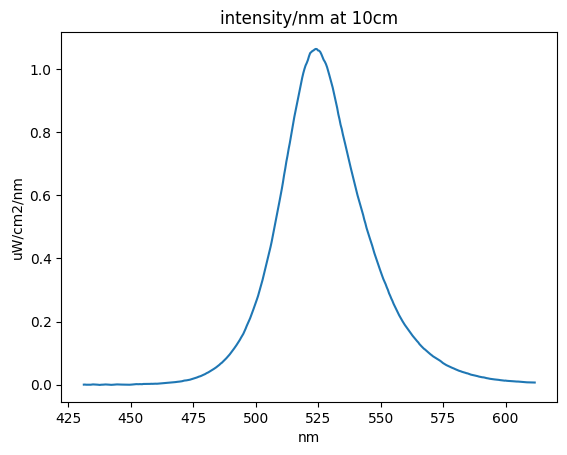

In [7]:
# Initialize a list to store the data
wavelen = []
ints_nm = []

with open(filename, 'r') as file:
    for line in file:
        parts = line.split()
        wavelen.append(float(parts[0]))
        ints_nm.append(float(parts[1]))

print(len(wavelen))
fro = 500
to = 900
plt.plot(wavelen[fro:to],ints_nm[fro:to])
plt.ylabel("uW/cm2/nm")
plt.xlabel("nm")
plt.title("intensity/nm at 10cm")

In [8]:
I = simps(ints_nm, wavelen)
P = I*A*1e-3 #mW
print("total power at 10 cm = ", P, "mW")

Ir_SR_pr = P/SR
print("the theoretical Radiant Intensity = ",Ir_SR, "mW/sr")
print("the measured Radiant Intensity = ",Ir_SR_pr, "mW/sr")

total power at 10 cm =  0.04242488599225113 mW
the theoretical Radiant Intensity =  95.63066240230752 mW/sr
the measured Radiant Intensity =  1.0765513896327927 mW/sr
